In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Import data

In [11]:
learn_data = pd.read_csv("Data\\learn.csv", sep = ",", index_col = 0)
learn_data

ambient_humidity  baking_duration  cooling_period  cream_fat_content  \
id                                                                           
1                 54.0             24.0            26.0              100.4   
2                 66.0             37.0            34.0               98.0   
3                 41.0             30.0            19.0               99.3   
4                 62.0             24.0            48.0               98.0   
5                 55.0             21.0            34.0              100.1   
...                ...              ...             ...                ...   
5196              60.0             18.0            35.0               96.0   
5197              61.0             25.0            40.0               96.4   
5198              69.0             18.0            36.0               97.7   
5199              70.0             25.0            40.0              101.2   
5200              54.0             26.0            39.0               95.8   

      egg_temperature  egg_yolk_count  final_temperature  lemon_zest_ph  \
id                                                                        
1                52.0            11.0              309.0            3.2   
2                46.0            10.0              317.0            3.3   
3                53.0            10.0              130.0            3.4   
4               115.0             9.0              354.0            3.3   
5                48.0             9.0              211.0            3.0   
...               ...             ...                ...            ...   
5196             72.0            11.0              215.0            3.3   
5197             99.0             9.0              367.0            3.2   
5198             90.0            11.0              206.0            3.6   
5199            139.0             9.0              414.0            3.1   
5200             36.0            10.0              333.0            3.5   

      notes_baker   origin  oven_temperature     pastry_type  preheating_time  \
id                                                                              
1             NaN   Lisboa               NaN     Pastel Nata            207.0   
2             NaN   Lisboa             306.0             NaN            245.0   
3             NaN    Porto             121.0             NaN            186.0   
4             NaN   Lisboa             357.0  Pastel de Nata            186.0   
5             NaN   Lisboa             202.0  Pastel de nata            218.0   
...           ...      ...               ...             ...              ...   
5196          NaN  Lisboa              222.0             NaN            177.0   
5197          NaN   Lisboa             366.0  Pastel De Nata            224.0   
5198          NaN   Lisboa             203.0  Pastel de nata            158.0   
5199          NaN   Lisboa             391.0             NaN            196.0   
5200          NaN  Lisboa              346.0  Pastel de nata            174.0   

      salt_ratio  sugar_content  vanilla_extract quality_class  
id                                                              
1          42.74           22.8              5.7            KO  
2          41.73           11.6              4.0            KO  
3          75.10           20.3              7.5            OK  
4          46.41           73.3              4.2            OK  
5          56.52           80.1              6.0            KO  
...          ...            ...              ...           ...  
5196       34.42           58.9              5.7            OK  
5197       46.18          141.4              6.5            KO  
5198       28.46           10.0              6.0            OK  
5199       56.92          188.9              5.7            KO  
5200       53.50           17.9              4.5            KO  

[5200 rows x 17 columns]

Get the columns names

In [ ]:
learn_data.columns

Index(['ambient_humidity', 'baking_duration', 'cooling_period',
       'cream_fat_content', 'egg_temperature', 'egg_yolk_count',
       'final_temperature', 'lemon_zest_ph', 'notes_baker', 'origin',
       'oven_temperature', 'pastry_type', 'preheating_time', 'salt_ratio',
       'sugar_content', 'vanilla_extract', 'quality_class'],
      dtype='object')

Classifing the columns:

- ambient_humidity: Numerical

- baking_duration: Numerical

- cooling_period: Numerical

- cream_fat_content: Numerical

- egg_temperature: Numerical

- egg_yolk_count: Numerical

- final_temperature: Numerical

- lemon_zest_ph: Numerical

- notes_baker: MISSING EVERTHING but Categorical

- origin: Categorical

- oven_temperature: Numerical

- pastry_type: Categorical

- preheating_time: Numerical

- salt_ratio: Numerical

- sugar_content: Numerical

- vanilla_extract: Numerical

- quality_class: Categorical


Getting a more detailed information about the imported data

In [ ]:
learn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 1 to 5200
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ambient_humidity   5182 non-null   float64
 1   baking_duration    5199 non-null   float64
 2   cooling_period     5199 non-null   float64
 3   cream_fat_content  5176 non-null   float64
 4   egg_temperature    5176 non-null   float64
 5   egg_yolk_count     5176 non-null   float64
 6   final_temperature  5175 non-null   float64
 7   lemon_zest_ph      5174 non-null   float64
 8   notes_baker        0 non-null      float64
 9   origin             5039 non-null   object 
 10  oven_temperature   5179 non-null   float64
 11  pastry_type        3411 non-null   object 
 12  preheating_time    5181 non-null   float64
 13  salt_ratio         5187 non-null   float64
 14  sugar_content      5178 non-null   float64
 15  vanilla_extract    5182 non-null   float64
 16  quality_class      5199 non-n

Getting to know the important measures that will be used in the following project

In [ ]:
learn_data.describe()

ambient_humidity  baking_duration  cooling_period  cream_fat_content  \
count       5182.000000      5199.000000     5199.000000         5176.00000   
mean          59.980316        26.979804       31.817850           98.41306   
std           11.616151         8.320079       14.427143            1.99735   
min           40.000000        14.000000        0.000000           91.90000   
25%           50.000000        21.000000       25.000000           97.10000   
50%           60.000000        25.000000       31.000000           98.40000   
75%           70.000000        30.000000       39.000000           99.80000   
max           80.000000        89.000000      105.000000          107.30000   

       egg_temperature  egg_yolk_count  final_temperature  lemon_zest_ph  \
count      5176.000000     5176.000000        5175.000000    5174.000000   
mean         70.812403       10.498068         223.577198       3.218902   
std          35.439831        1.257709          85.258779       0.165909   
min          12.000000        8.000000          31.000000       2.700000   
25%          44.000000       10.000000         164.000000       3.100000   
50%          67.000000       10.000000         226.000000       3.200000   
75%          92.000000       11.000000         284.000000       3.300000   
max         575.000000       15.000000         722.000000       4.000000   

       notes_baker  oven_temperature  preheating_time   salt_ratio  \
count          0.0       5179.000000      5181.000000  5187.000000   
mean           NaN        223.541031       216.413241    55.882034   
std            NaN         84.482034        39.533116    34.867144   
min            NaN         58.000000       114.000000    11.550000   
25%            NaN        166.000000       192.000000    37.910000   
50%            NaN        227.000000       209.000000    47.170000   
75%            NaN        283.000000       231.000000    64.610000   
max            NaN        713.000000       499.000000   640.320000   

       sugar_content  vanilla_extract  
count    5178.000000      5182.000000  
mean       54.003418         5.307159  
std        47.213038         1.483175  
min         6.000000         2.200000  
25%        18.000000         4.300000  
50%        30.000000         5.100000  
75%        80.675000         6.000000  
max       656.500000        20.800000

Shape of the imported data

In [ ]:
learn_data.shape

(5200, 17)

Check for missing values

In [ ]:
learn_data.isnull().sum()

ambient_humidity       18
baking_duration         1
cooling_period          1
cream_fat_content      24
egg_temperature        24
egg_yolk_count         24
final_temperature      25
lemon_zest_ph          26
notes_baker          5200
origin                161
oven_temperature       21
pastry_type          1789
preheating_time        19
salt_ratio             13
sugar_content          22
vanilla_extract        18
quality_class           1
dtype: int64

Percentage of the missing data for each column

In [ ]:
#Percentage of missing values

learn_data.isnull().sum()/5200*100

ambient_humidity       0.346154
baking_duration        0.019231
cooling_period         0.019231
cream_fat_content      0.461538
egg_temperature        0.461538
egg_yolk_count         0.461538
final_temperature      0.480769
lemon_zest_ph          0.500000
notes_baker          100.000000
origin                 3.096154
oven_temperature       0.403846
pastry_type           34.403846
preheating_time        0.365385
salt_ratio             0.250000
sugar_content          0.423077
vanilla_extract        0.346154
quality_class          0.019231
dtype: float64

- Notes_backer as 100% -> significant (Delete)
- Pastry_type as 34.4% -> significant

A more carefull check about the categorical data

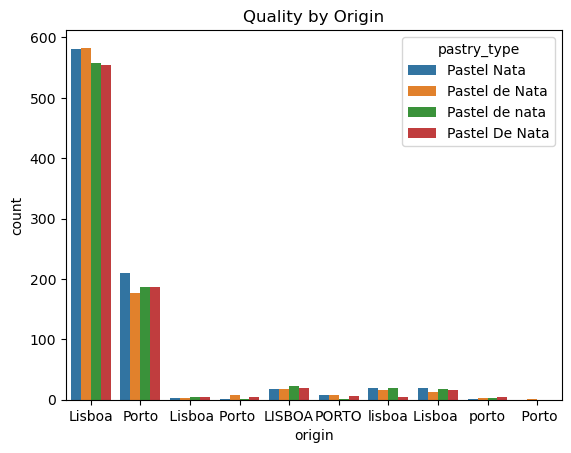

In [ ]:
sns.countplot(data=learn_data, x='origin', hue='pastry_type')
plt.title('Quality by Origin')
plt.show()

Names of each

In [ ]:
learn_data['origin'].unique()

array(['Lisboa', 'Porto', ' Lisboa', 'Porto ', 'LISBOA', 'PORTO',
       'lisboa', nan, 'Lisboa ', 'porto', ' Porto'], dtype=object)

Quantities of each

In [ ]:
learn_data['origin'].value_counts()


origin
Lisboa     3486
Porto      1167
LISBOA      119
Lisboa       88
lisboa       83
PORTO        33
Porto        25
 Lisboa      20
porto        15
 Porto        3
Name: count, dtype: int64

Temos 4 tipos de pastel de nata escritos :
- Pastel Nata
- Pastel de Nata
- Pastel de nata
- Pastel De Nata

Temos 5 tipos de Lisboa :
- Lisboa
- (espaço) Lisboa
- LISBOA
- lisboa
- Lisboa (espaço)

Temos 5 tipos de Porto :
- Porto
- (espaço) Porto
- Porto
- porto
- Porto (espaço)


Missing values

With this we can change all names written differently into 1 singular name ("Lisboa", "Porto", "Pastel de Nata")

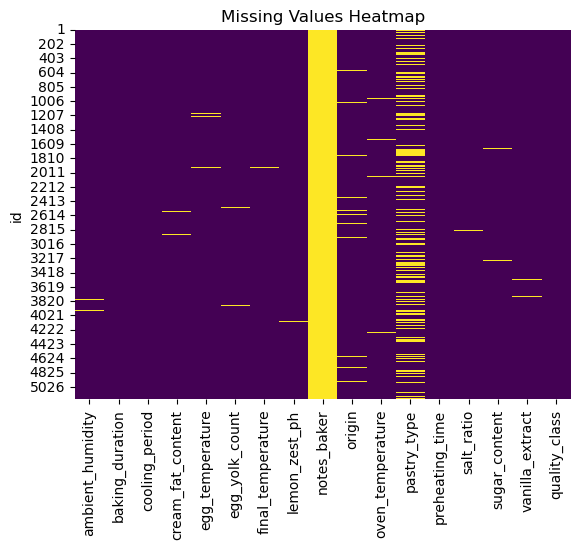

In [ ]:
sns.heatmap(learn_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

- Notes_backer as 100% -> significant (Delete)
- Pastry_type as 34.4% -> significant (Probably just change everything to "Pastel de Nata")

Outliers

In [ ]:
#numeric_columns = learn_data.select_dtypes(include='number').columns

#for col in numeric_columns:
#    if col == "notes_baker": # Tava a dar erro no notes baker devido aos null values acho
#        continue
#    sns.boxplot(x=learn_data[col])
#    plt.title(f"Boxplot of {col}")
#    plt.show()


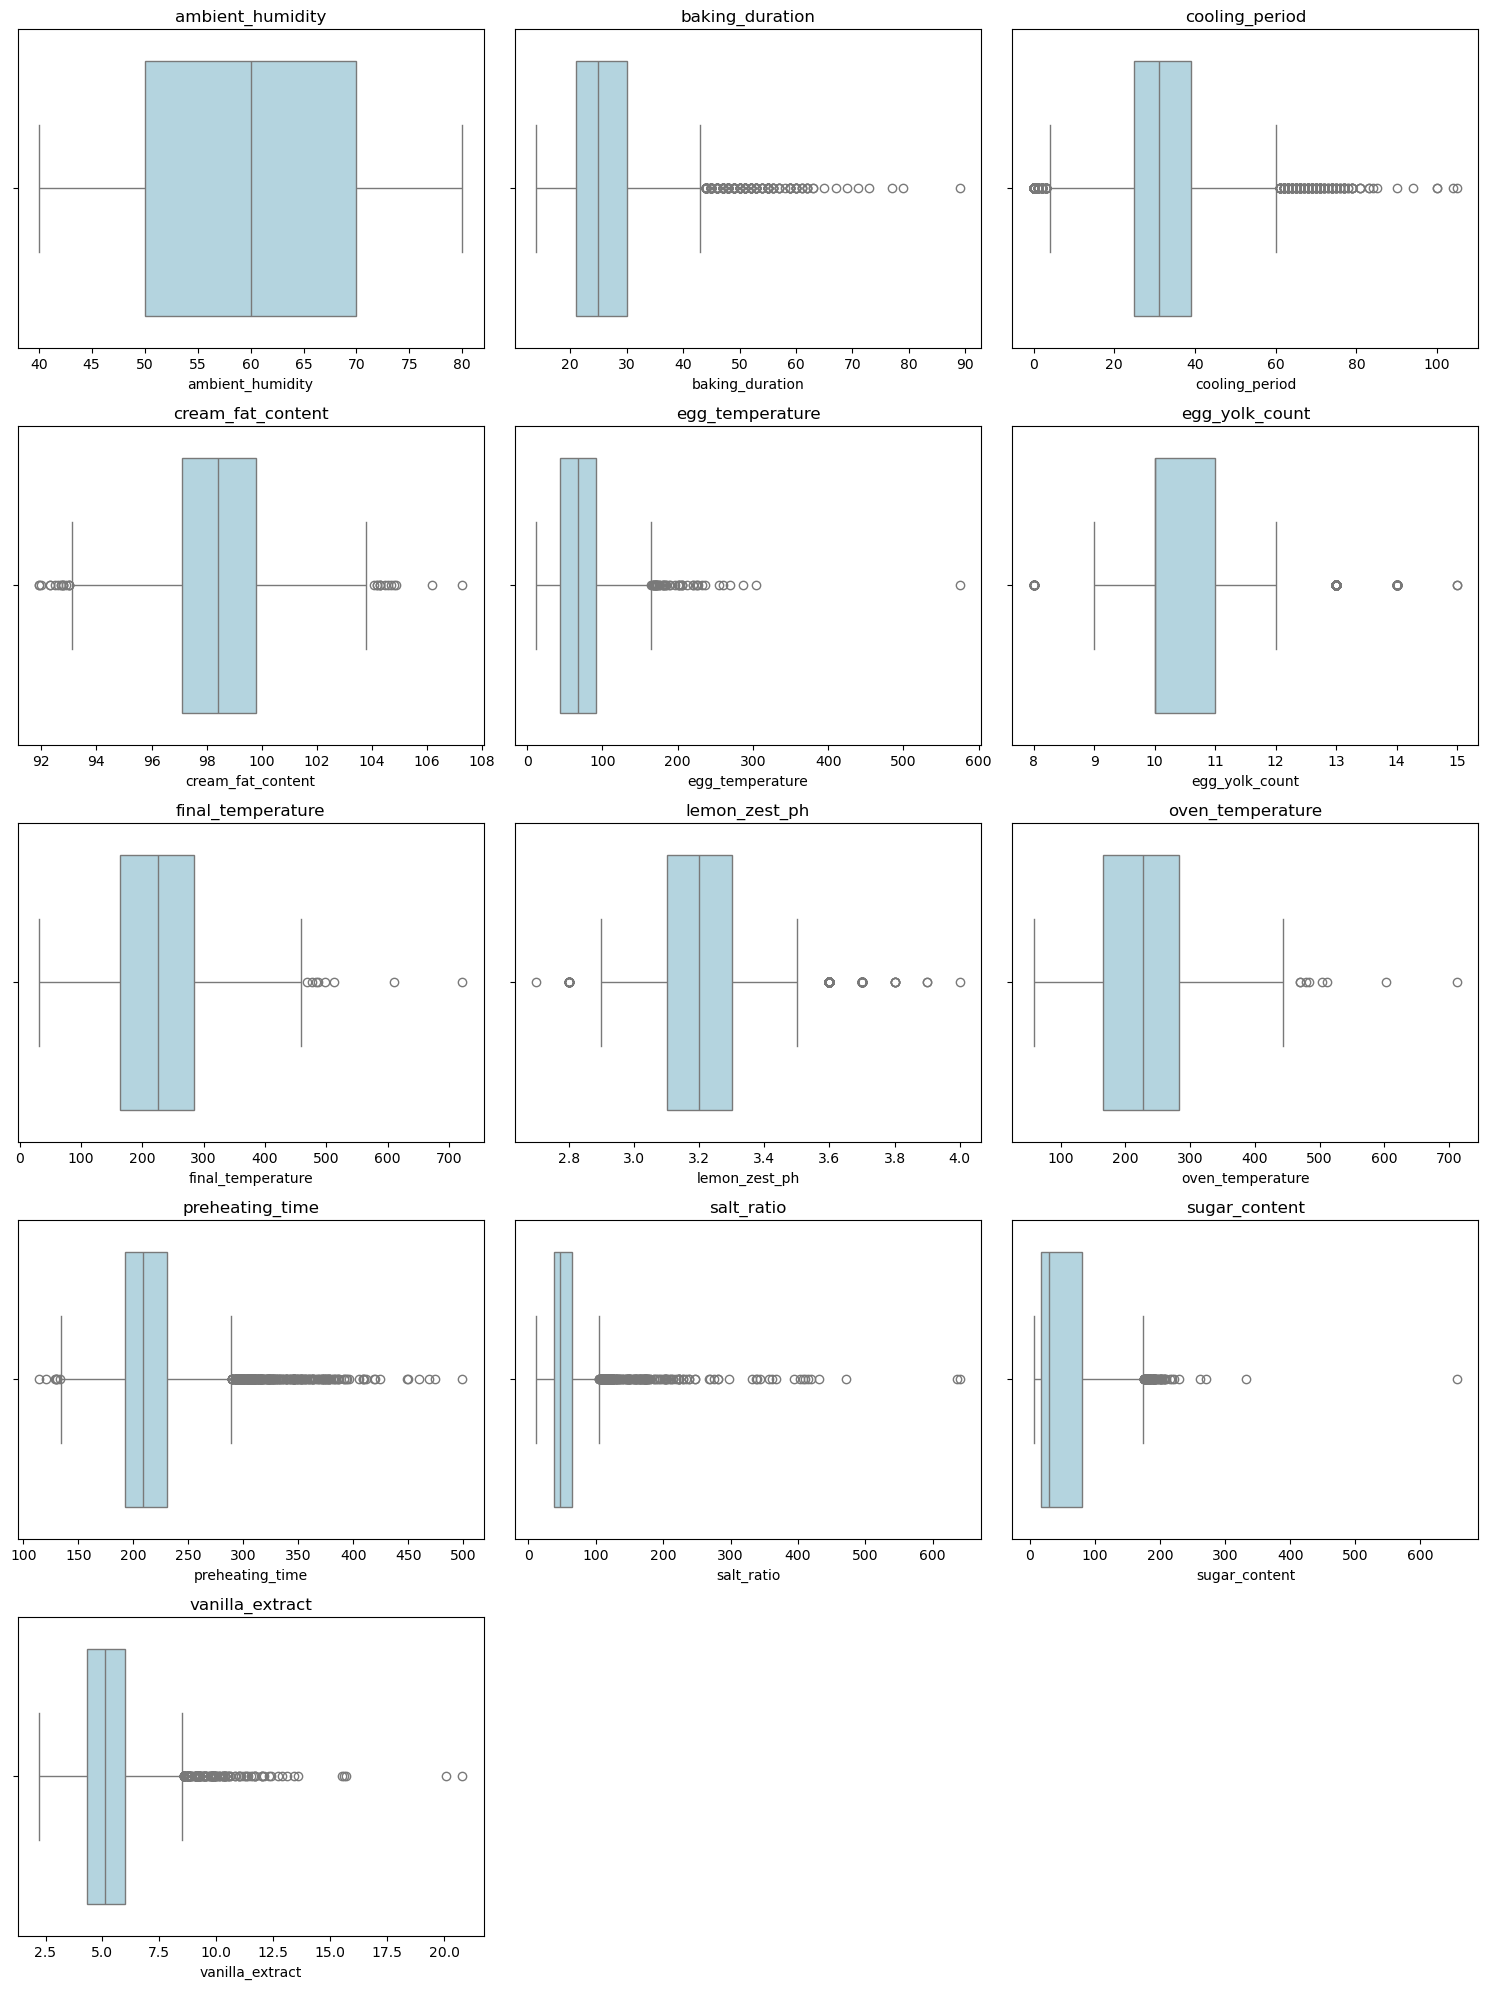

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Seleciona apenas colunas numéricas
numeric_columns = learn_data.select_dtypes(include='number').columns

# Remove colunas problemáticas (como notes_baker, se quiseres)
numeric_columns = [col for col in numeric_columns if col != 'notes_baker']

# Define o número de colunas e linhas da grelha
num_cols = 3  # 3 boxplots por linha
num_rows = math.ceil(len(numeric_columns) / num_cols)

# Cria a figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten (caso só haja 1 linha)
axes = axes.flatten()

# Cria cada boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=learn_data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)

# Esconde eixos vazios (se o número não for múltiplo de 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajusta espaçamento
plt.tight_layout()
plt.show()


- Egg temperature has an outlier : < 400
- oven temperature and final temperature problably as 2 equal outliers : <550
- salt ratio problably have some outliers : < 600
- sugar content probably has an onlier : < 600
- vanila extract problably has outliers : < 18

---

- Final temperature and oven temperature may have a relationship with those outliers, so we shoulnd't remove them

- Salt ratio, sugar content and maybe vanilla_extract may have a relationship with their outliers, so we shoulnd't remove them

Check the number of KO's or OK's

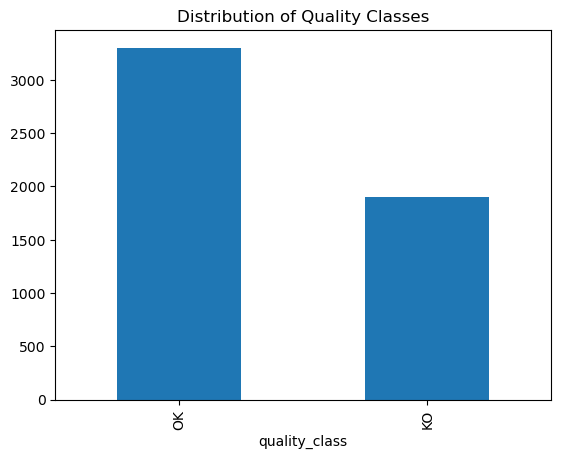

In [ ]:
learn_data['quality_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Quality Classes")
plt.show()


Hitogram to check skewness and distribution

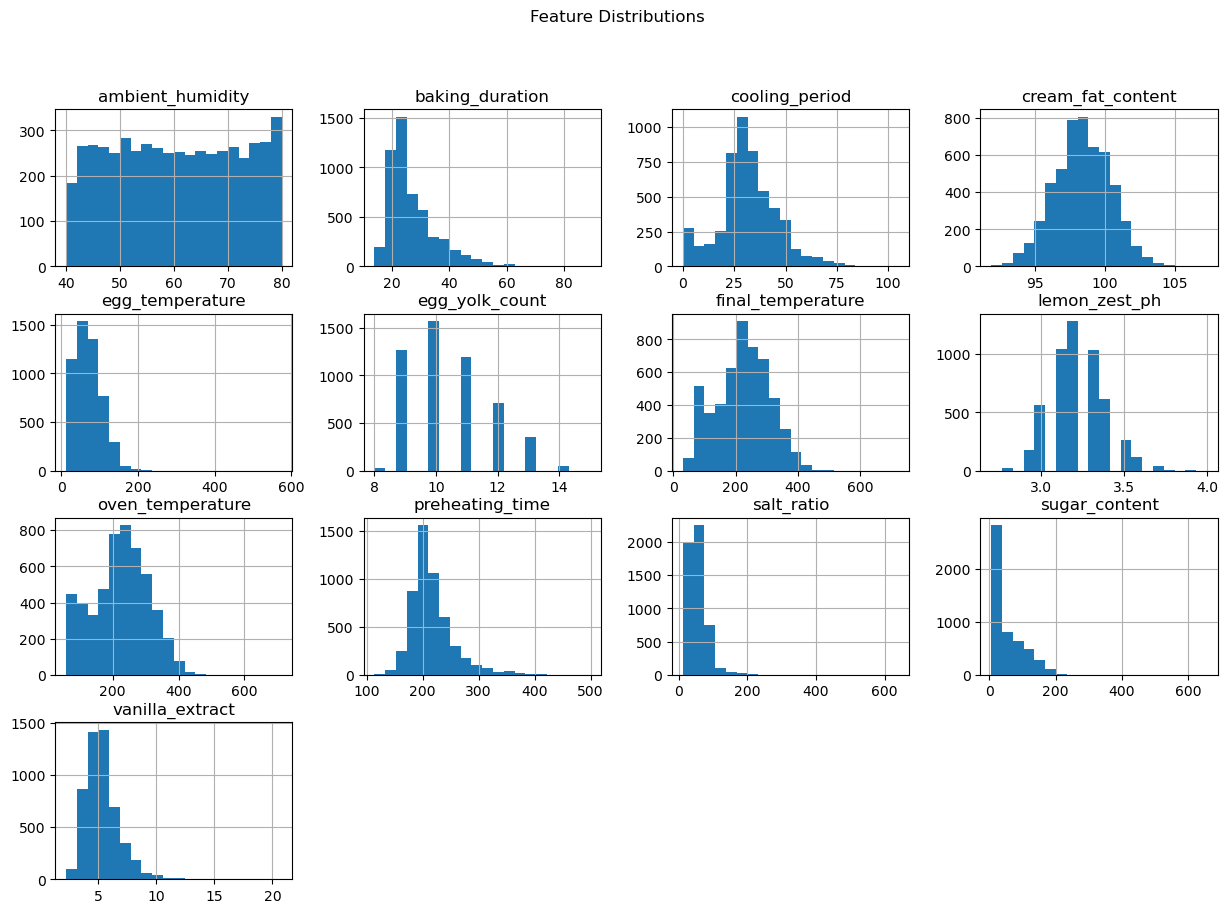

In [ ]:
learn_data[numeric_columns].hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()


How to standardize the variables:

- ambient_humidity : already good
- baking_duration : log
- cooling_period : normal
- cream_fat_content : normal
- egg_temperature : log
- egg_yolk_count : normal
- final_temperature : normal
- lemon_zest_ph : normal
- oven_temperature : normal or log
- preheating_time : log
- salt_ratio : log
- sugar_content : log
- vanilla_extract : log

Check the correlation of the numerical columns

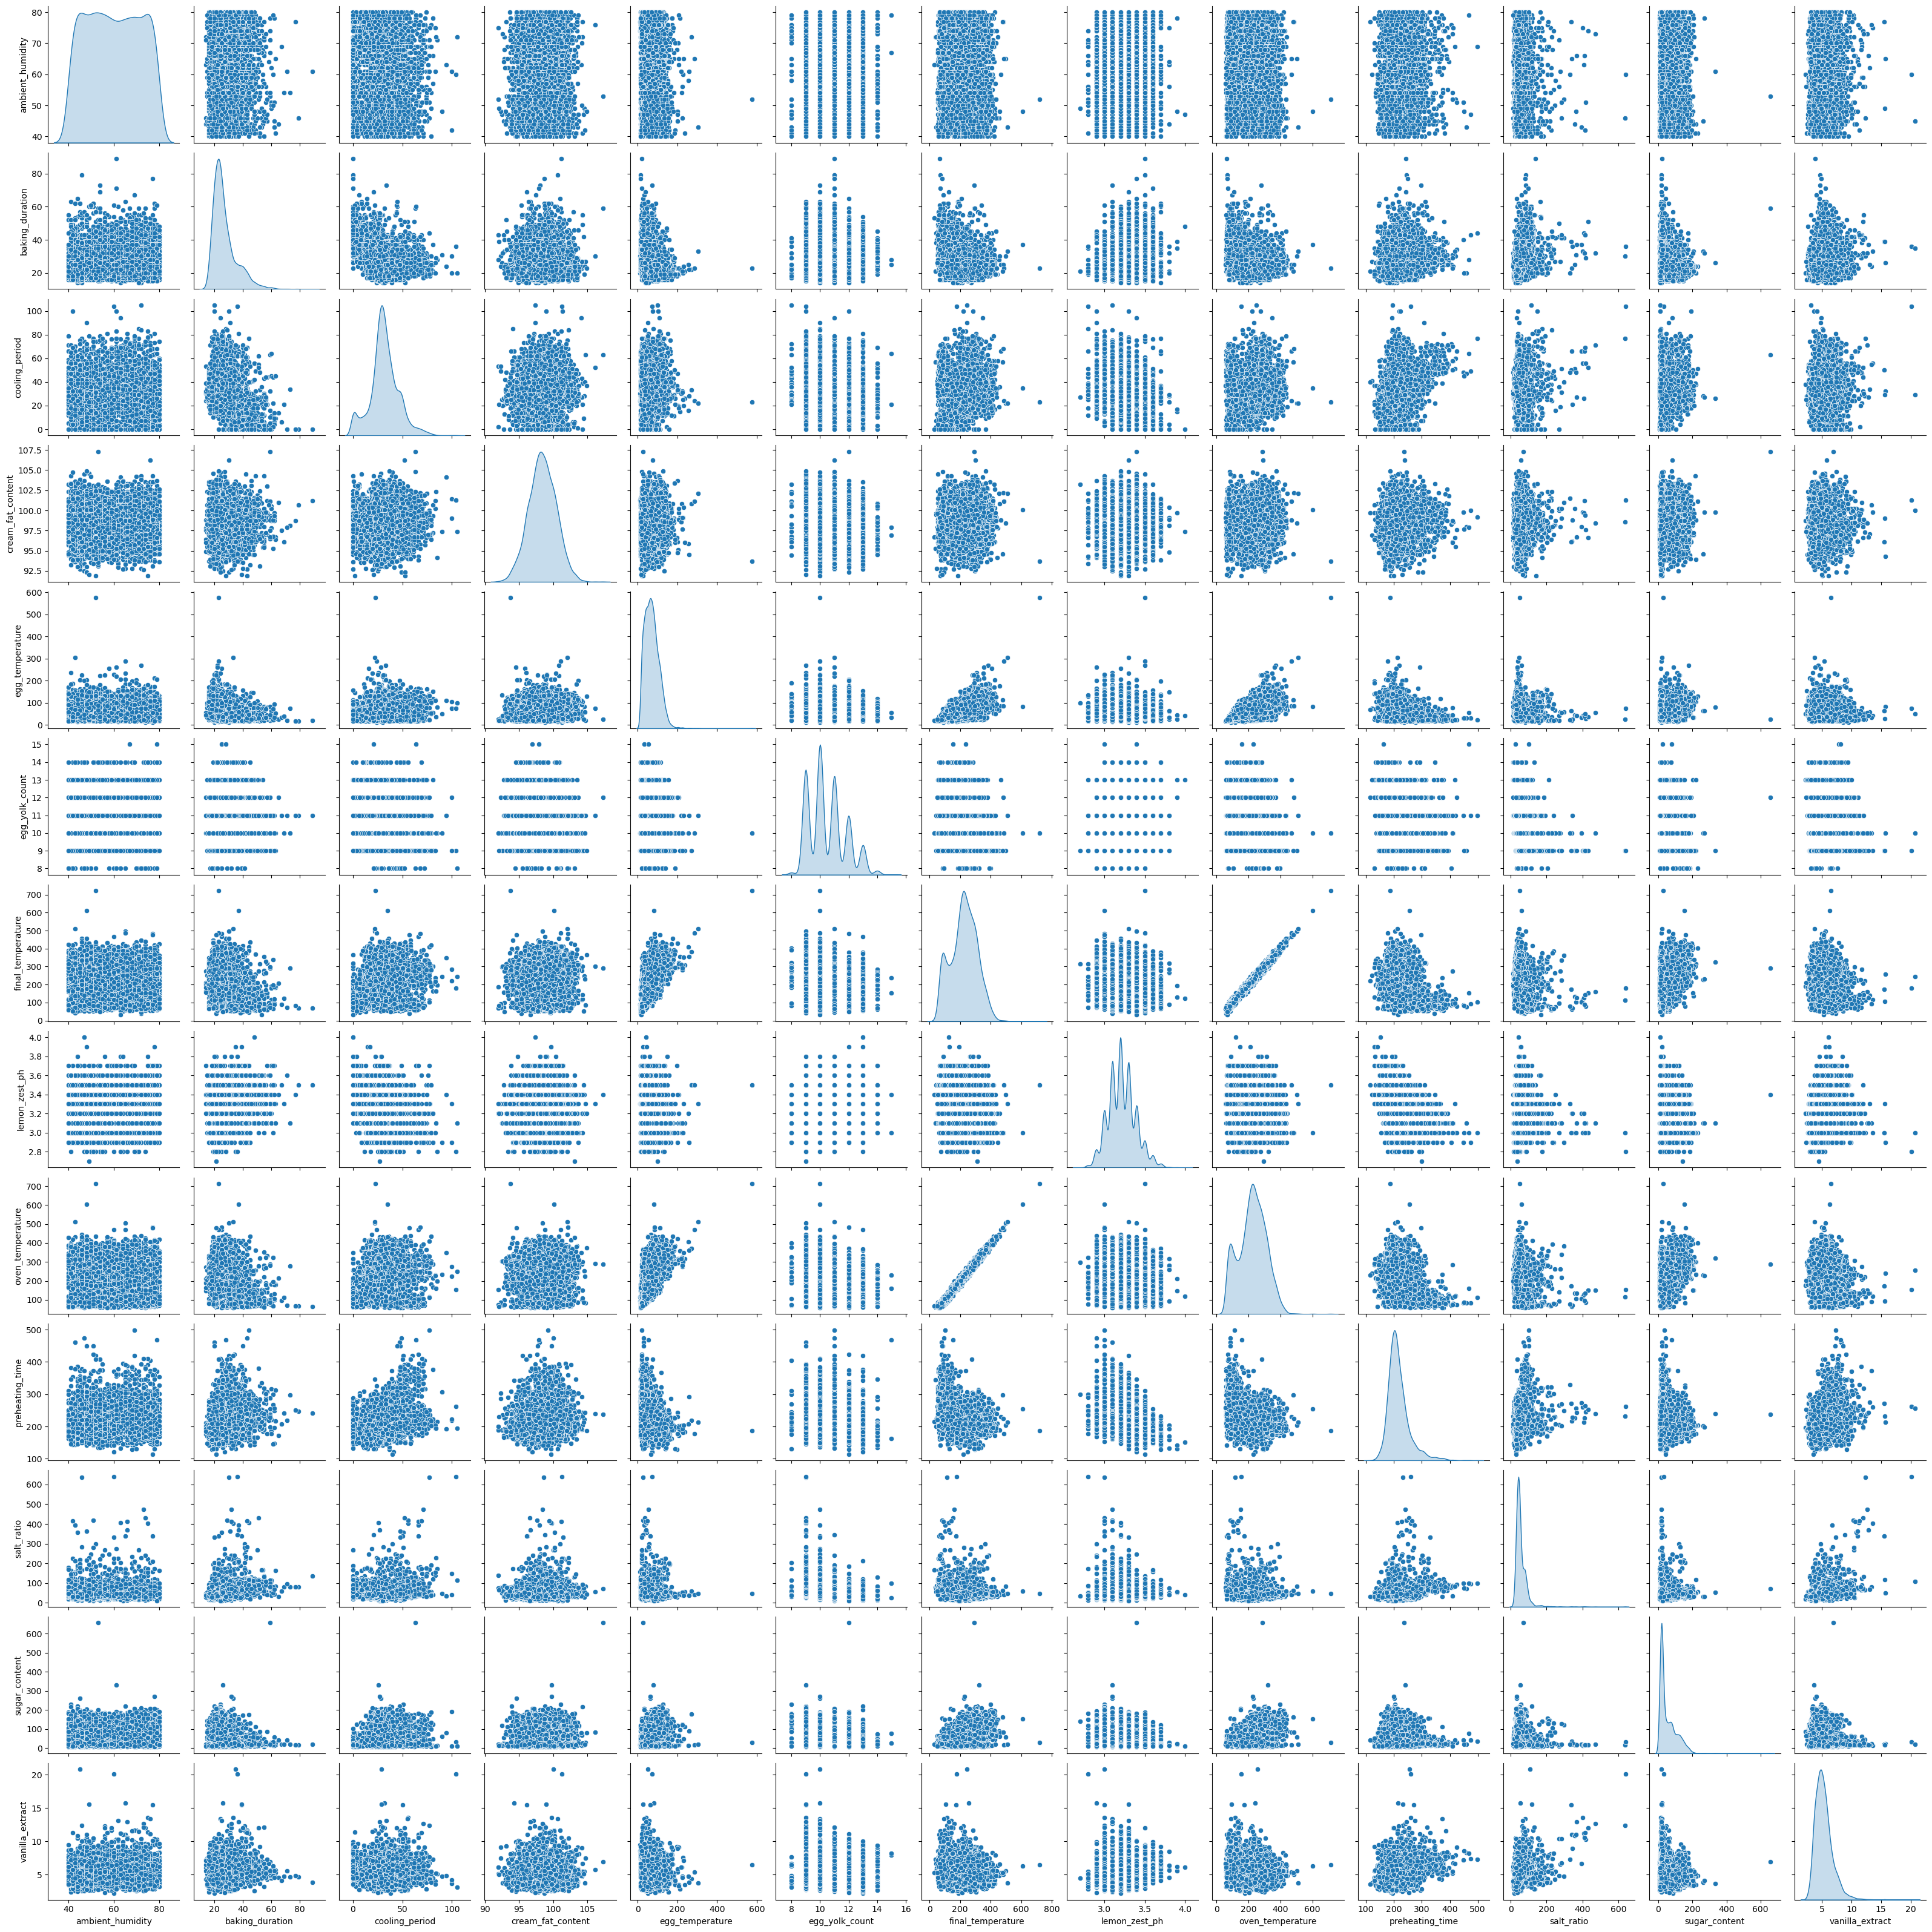

In [ ]:
# Select only numeric columns (scatter plots need numeric data)
#numeric_cols = learn_data.select_dtypes(include='number').columns.tolist()

# Create a grid of scatter plots and histograms
#sns.pairplot(learn_data[numeric_cols], diag_kind='kde')
#plt.show()

# Select only numeric columns
numeric_cols = learn_data.select_dtypes(include='number').columns.tolist()

# Explicitly remove unwanted columns
exclude_cols = ["pastry_type", "origin", "notes_baker"]
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Create the grid of scatter plots
sns.pairplot(learn_data[numeric_cols], diag_kind='kde')
plt.show()



In here we see certain correlations between certain variables, we can change to see for a certain variable

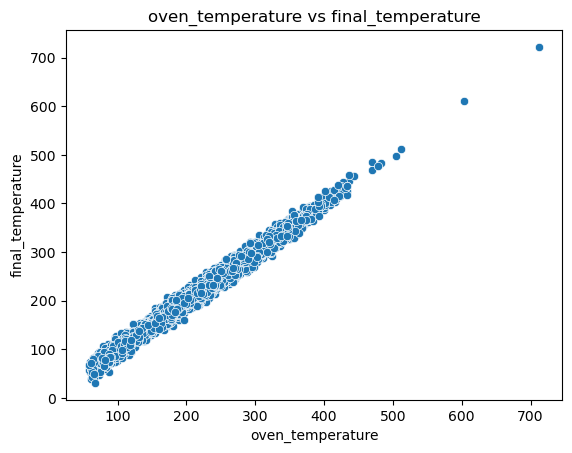

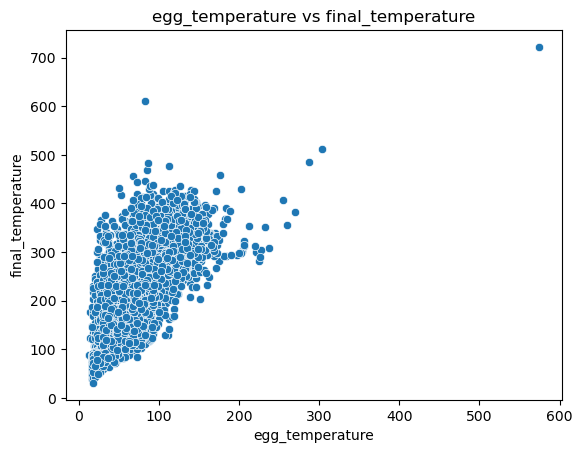

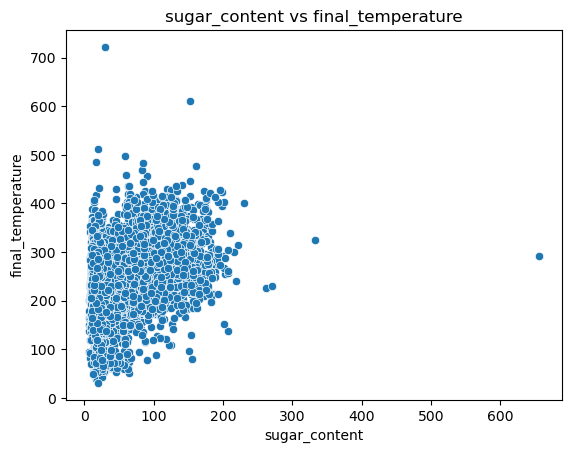

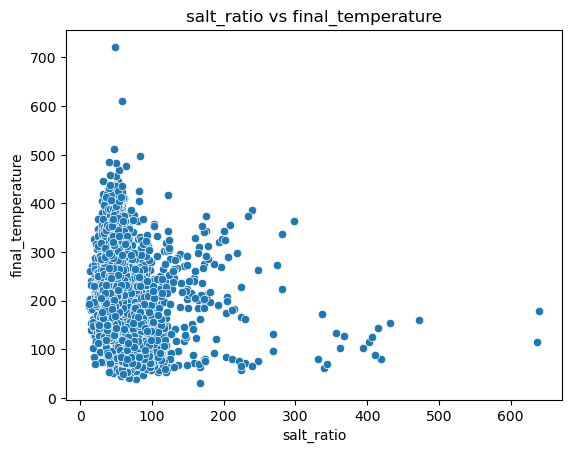

In [ ]:
target = 'final_temperature'
features = ['oven_temperature', 'egg_temperature', 'sugar_content', 'salt_ratio']

for col in features:
    sns.scatterplot(data=learn_data, x=col, y=target)
    plt.title(f'{col} vs {target}')
    plt.show()


Relationships between variables so the model can learn the correlations between the variables and come to a conclution

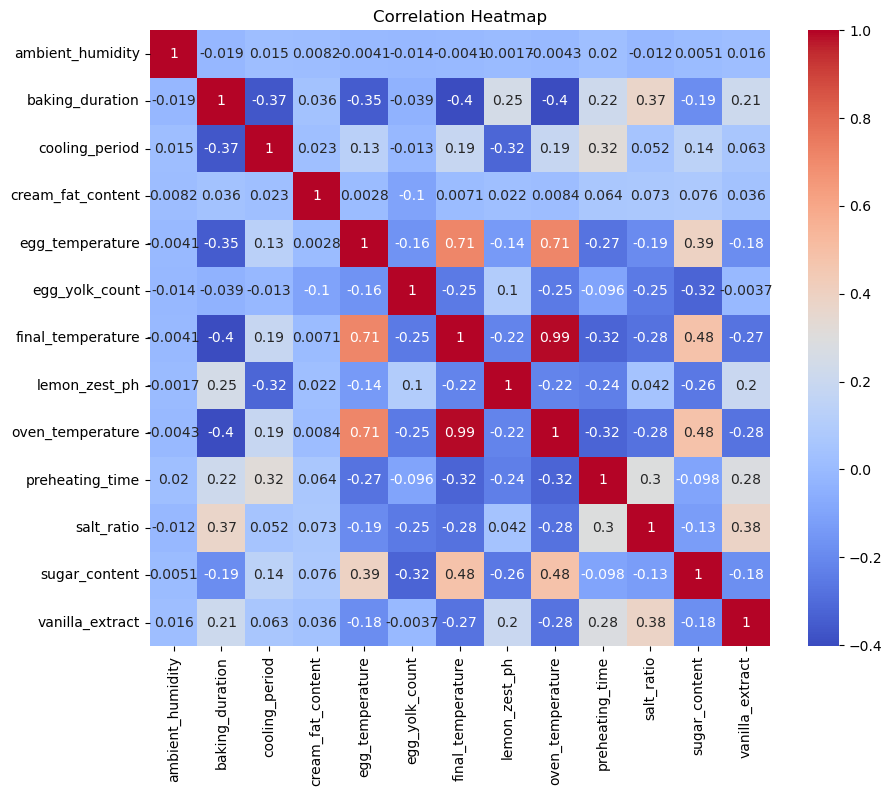

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(learn_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


- Final temperature and oven temperature have almost 1 of correlation so we could either drop one of them or merge them

Relationship Between Features and Target (You want to see which features differ most between “OK” and “KO” Pastéis.
Those might be strong predictors.)

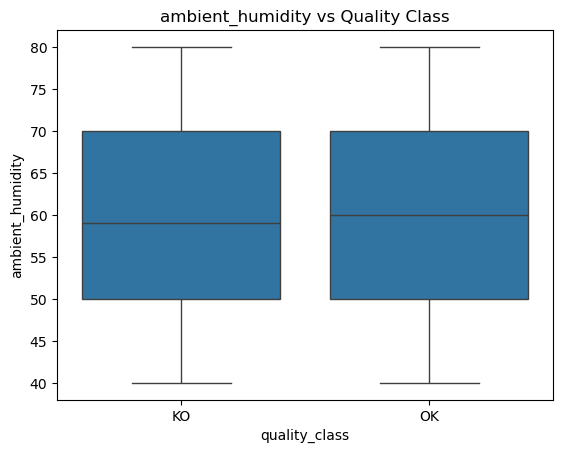

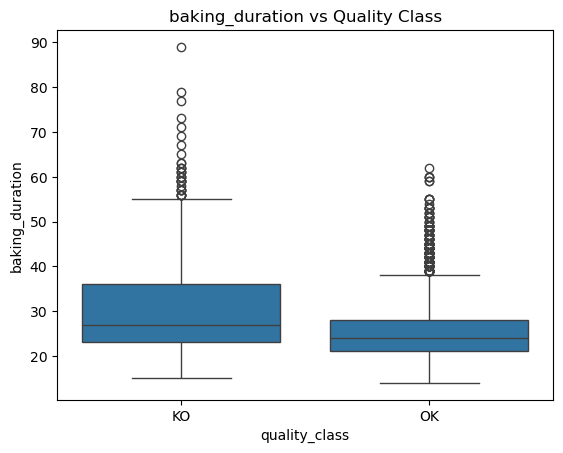

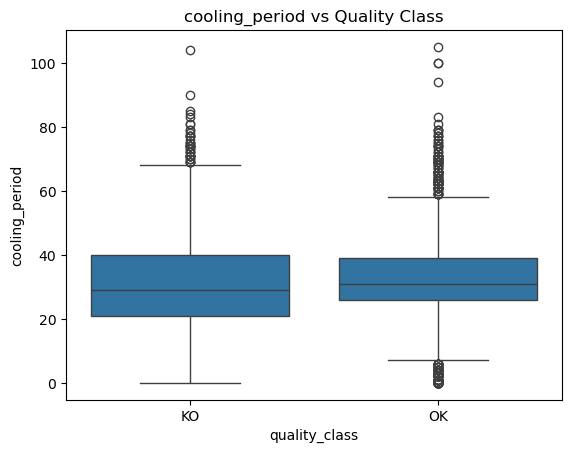

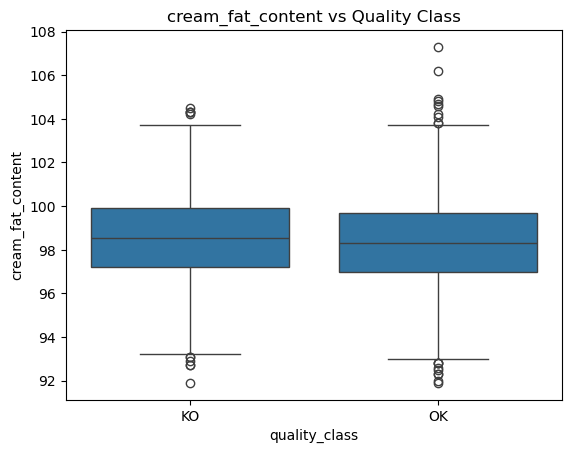

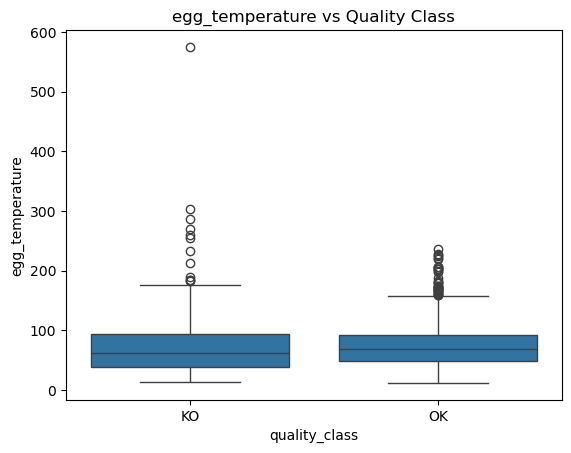

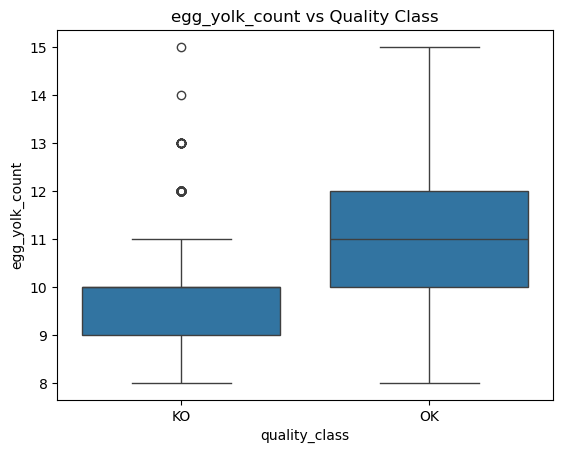

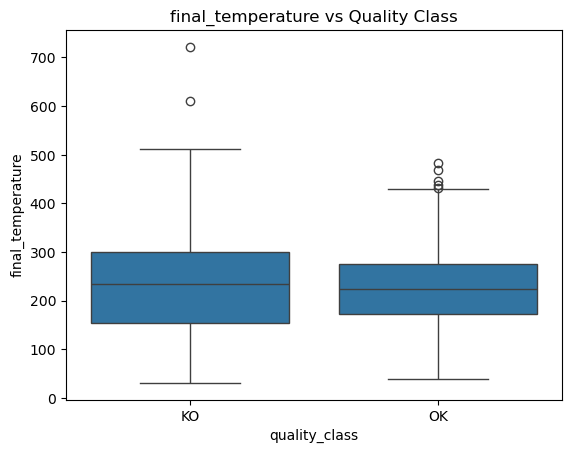

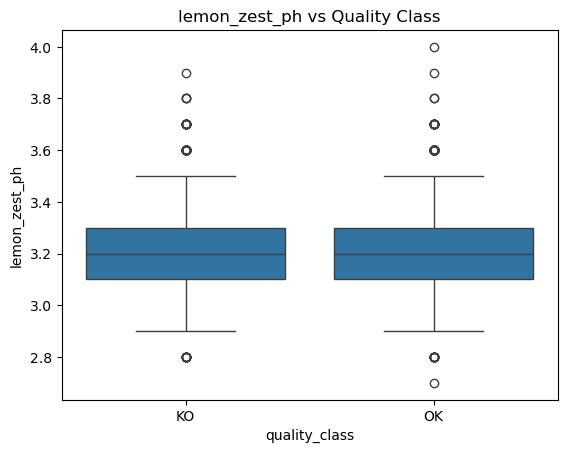

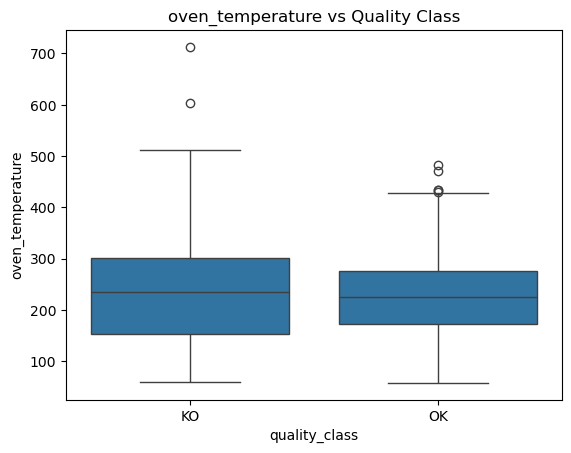

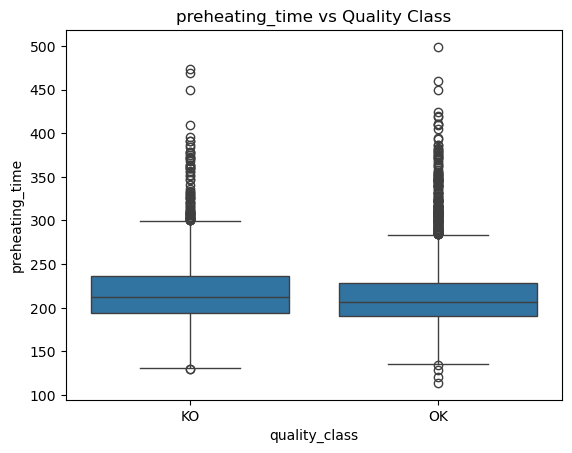

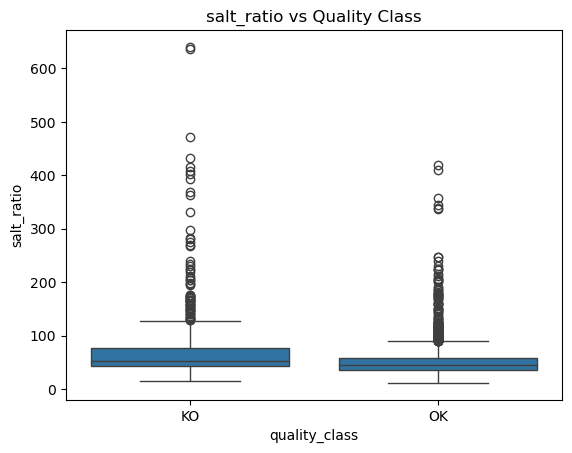

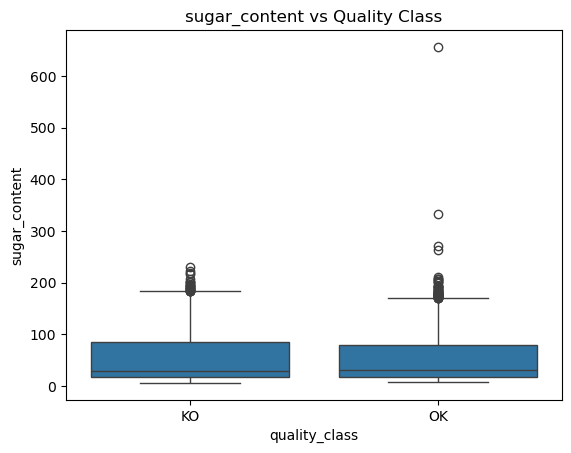

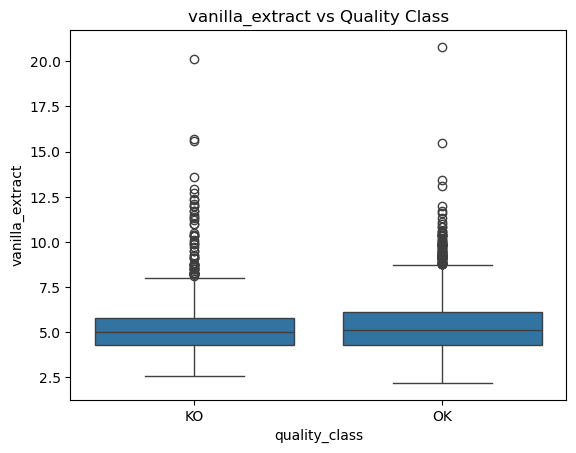

In [ ]:
for col in numeric_columns:
    sns.boxplot(x='quality_class', y=col, data=learn_data)
    plt.title(f"{col} vs Quality Class")
    plt.show()
